 ***BASIC STATISTICS LEVEL - 1***




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('/content/sample_data/sales_data_with_discounts.csv')

In [3]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [4]:
# Calculate statistics
statistics = df[numerical_cols].describe().transpose()
statistics['mode'] = df[numerical_cols].mode().iloc[0]

In [5]:
# Print statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(statistics)


Descriptive Statistics for Numerical Columns:
                   count          mean           std         min          25%  \
Volume             450.0      5.066667      4.231602    1.000000     3.000000   
Avg Price          450.0  10453.433333  18079.904840  290.000000   465.000000   
Total Sales Value  450.0  33812.835556  50535.074173  400.000000  2700.000000   
Discount Rate (%)  450.0     15.155242      4.220602    5.007822    13.965063   
Discount Amount    450.0   3346.499424   4509.902963   69.177942   460.459304   
Net Sales Value    450.0  30466.336131  46358.656624  326.974801  2202.208645   

                           50%           75%            max          mode  
Volume                4.000000      6.000000      31.000000      3.000000  
Avg Price          1450.000000  10100.000000   60100.000000    400.000000  
Total Sales Value  5700.000000  53200.000000  196400.000000  24300.000000  
Discount Rate (%)    16.577766     18.114718      19.992407      5.007822  
Disco

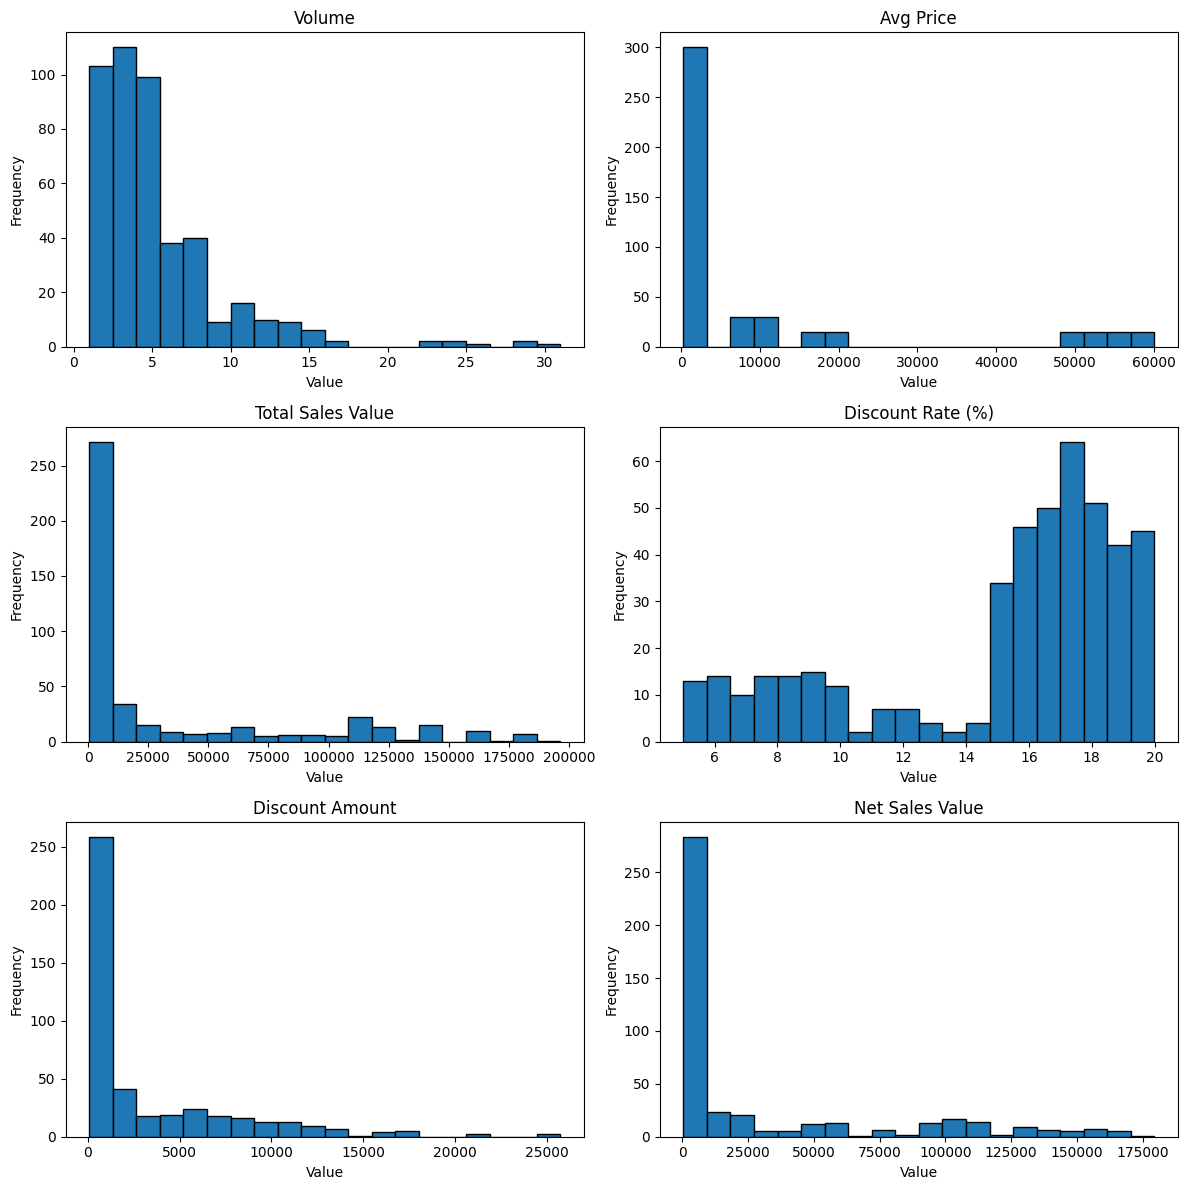

In [6]:
# Plot histograms for each numerical column
num_cols = len(numerical_cols)
nrows = (num_cols + 1) // 2
ncols = 2

plt.figure(figsize=(12, 4 * nrows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

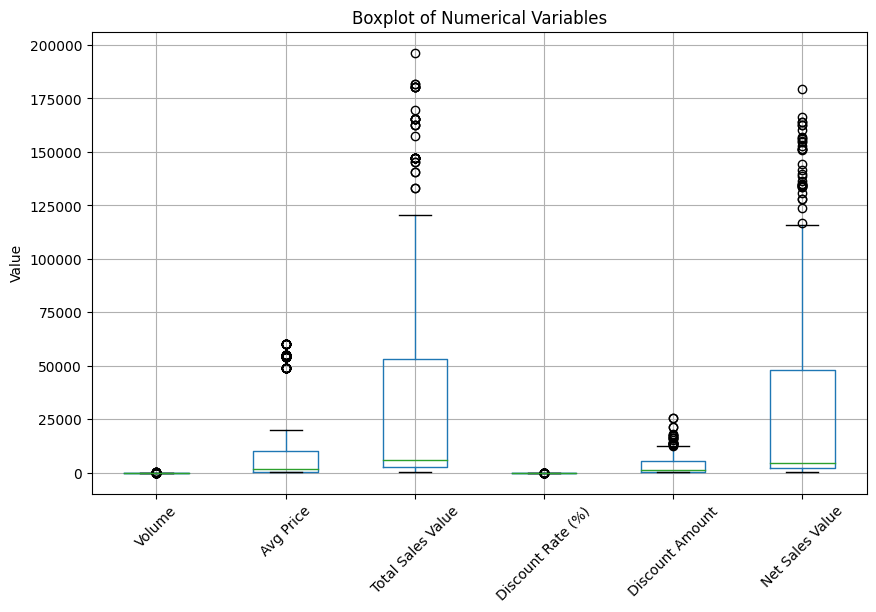

In [7]:
# Create boxplots for numerical variables
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [9]:
# Calculate number of rows needed for subplots
num_cat_cols = len(categorical_cols)
nrows = (num_cat_cols + 1) // 2
ncols = 2

<ipython-input-10-2c39e01a0174>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


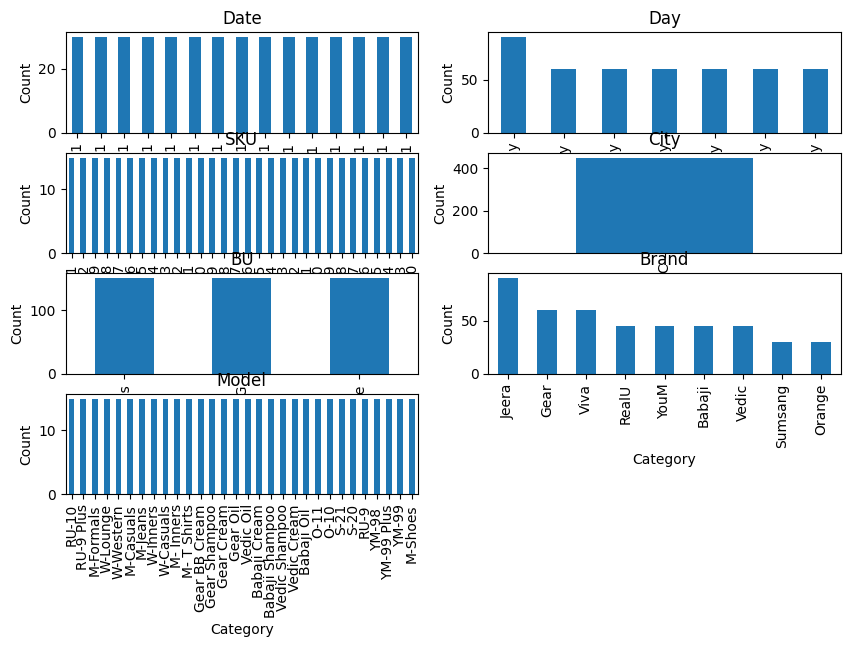

In [10]:
# Create bar charts for categorical variables
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(nrows, ncols, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('Category')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
# Standardization of numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Text(0, 0.5, 'Frequency')

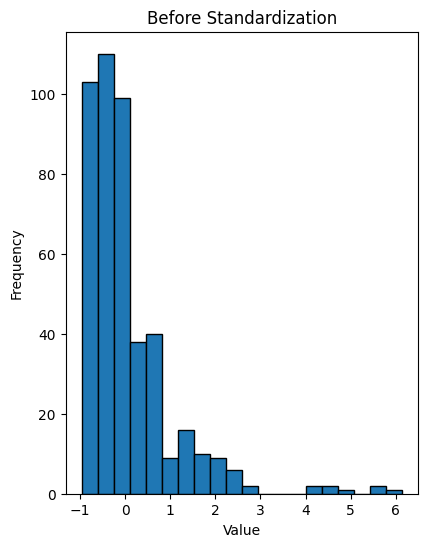

In [12]:
# Compare data distributions before and after standardization (example for one column)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Volume'], bins=20, edgecolor='black')
plt.title('Before Standardization')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

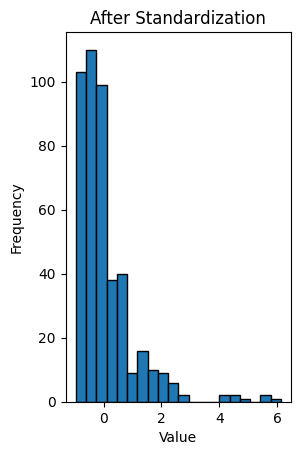

In [13]:
plt.subplot(1, 2, 2)
plt.hist(df['Volume'], bins=20, edgecolor='black')
plt.title('After Standardization')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [15]:
# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols)

In [16]:
# Display a portion of the transformed dataset
print("\nPortion of Transformed Dataset:")
print(df.head())


Portion of Transformed Dataset:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0         2.804756             True            False            False   
1         1.271026             True            False            False   
2         1.545675             True            False            False   
3         1.765810             True            False            False   
4        -0.227595             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Crea